## Dependencies

In [6]:
import matplotlib as plt
import networkx as nx # for graph creation
import time # for timing

## Brute Force

## Back Tracking

Solution Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 2 -> 4 -> 3 -> 0
Elapsed time: 0.000998 seconds


AttributeError: module 'matplotlib' has no attribute 'show'

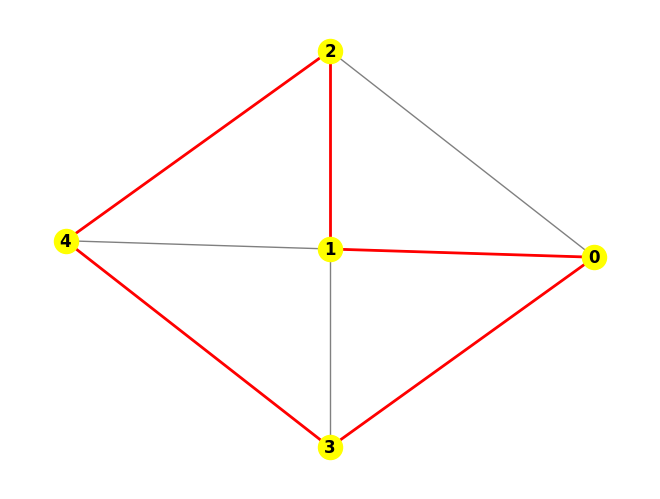

In [18]:
# Code referred from GeeksforGeeks - https://www.geeksforgeeks.org/hamiltonian-cycle/
class Graph():
    def __init__(self, vertices):
        # Initialize the graph as an adjacency matrix with all with 0's
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]
        self.V = vertices  # Set the number of vertices

    def add_edge(self, u, v):
        # Add an undirected edge between u and v
        self.graph[u][v] = 1
        self.graph[v][u] = 1

    def isSafe(self, v, pos, path):
        # Check if current vertex and last vertex in path are adjacent
        if self.graph[path[pos-1]][v] == 0:
            return False
        # Check if current vertex not already in path
        for vertex in path:
            if vertex == v:
                return False
        return True

   	# A recursive function to solve hamiltonian cycle problem 
    def hamCycleUtil(self, path, pos):
        # Base case: if all vertices are included in the path
        if pos == self.V:
            # Last vertex must be adjacent to the first vertex in path to make a cycle
            if self.graph[path[pos-1]][path[0]] == 1:
                return True
            else:
                return False
        # Explore all vertices other than the first vertex
        for v in range(1, self.V):
            if self.isSafe(v, pos, path):
                path[pos] = v
                if self.hamCycleUtil(path, pos+1):
                    return True
                # DeadEnd - Remove current vertex if it doesn't lead to a solution
                path[pos] = -1
        return False

    def hamCycle(self):
        # start timer
        start_time = time.time()
        # Initialize path as -1
        path = [-1] * self.V
        # Start from vertex 0 as the first vertex in the path
        path[0] = 0
        # Call the recursive helper function to find Hamiltonian cycle
        if not self.hamCycleUtil(path, 1):
            print("Solution does not exist\n")
            print("Elapsed time: {:.6f} seconds".format(time.time() - start_time))
            self.plot_graph()
            return False
        self.printSolution(path)
        print("Elapsed time: {:.6f} seconds".format(time.time() - start_time))
        self.plot_graph(path)
        return True

    def printSolution(self, path):
        print("Solution Exists: Following is one Hamiltonian Cycle")
        for vertex in path:
            print(vertex, end=' -> ')
        print(path[0])  # Print the first vertex again to show the complete cycle

    def plot_graph(self, path=None):
        G = nx.Graph()
        for i in range(self.V):
            for j in range(i, self.V):
                if self.graph[i][j] == 1:
                    G.add_edge(i, j)
        pos = nx.spectral_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='yellow', edge_color='gray')
        if path:
            edges_in_path = [(path[i], path[(i + 1) % self.V]) for i in range(self.V)]
            nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=2)
        plt.show()


# graph used in report
# g1 = Graph(5) 
# g1.add_edge(0, 1)
# g1.add_edge(0, 3)
# g1.add_edge(1, 2)
# g1.add_edge(1, 3)
# g1.add_edge(1, 4)
# g1.add_edge(2, 4)
# g1.add_edge(3, 4)
# g1.hamCycle()

g2 = Graph(5) 
g2.add_edge(0, 1)
g2.add_edge(0, 3)
g2.add_edge(1, 2)
g2.add_edge(1, 3)
g2.add_edge(1, 4)
g2.add_edge(2, 4)
g2.add_edge(3, 4)
g2.add_edge(0, 2)
# g2.hamCycle()
times = []
start_time = time.time()
g2.hamCycle()
elapsed_time = time.time() - start_time
times.append(elapsed_time)
plt.plot(5, times, marker='o')
plt.xlabel('Number of Vertices')
plt.ylabel('Execution Time (seconds)')
plt.title('Time Complexity of Hamiltonian Cycle Detection')
plt.grid(True)
plt.show()


## Dynamic Programming